# Pokemon Classification Challenge

Growing up, Pokemon was such an exciting experience for me. Not only playing the game, but also watching the TV show every Saturday morning. It was not until I got much older that I realized that Pokemon was more than just catching 'em all. I learned about their "stats" or status points, which made each Pokemon even more different beyond their type and weaknesses. Whether they are strong in Attack, Special Attack, Defense, Special Defense, Speed, or Health Points became wildly more important to me. In this challenge, I first will try to use unsupervised learning methods to see if it separates Pokemon well enough by their type. 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
df = pd.read_csv('C:/Users/jc/Downloads/Pokemon.csv').drop('Type 2', axis=1)

Indexing the types with Type1 IDs instead.

In [10]:
df['Type1Id'] = df['Type 1'].rank(method='dense').astype(int)
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type1Id
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,10
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,10
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,10
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,10
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,7


In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
targets = ['Type1Id']

Normalize our values with the standard scaler.

In [13]:
df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

TSNE and PCA on our features.

In [14]:
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

Plotting the graphs to see how well they were grouped together.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

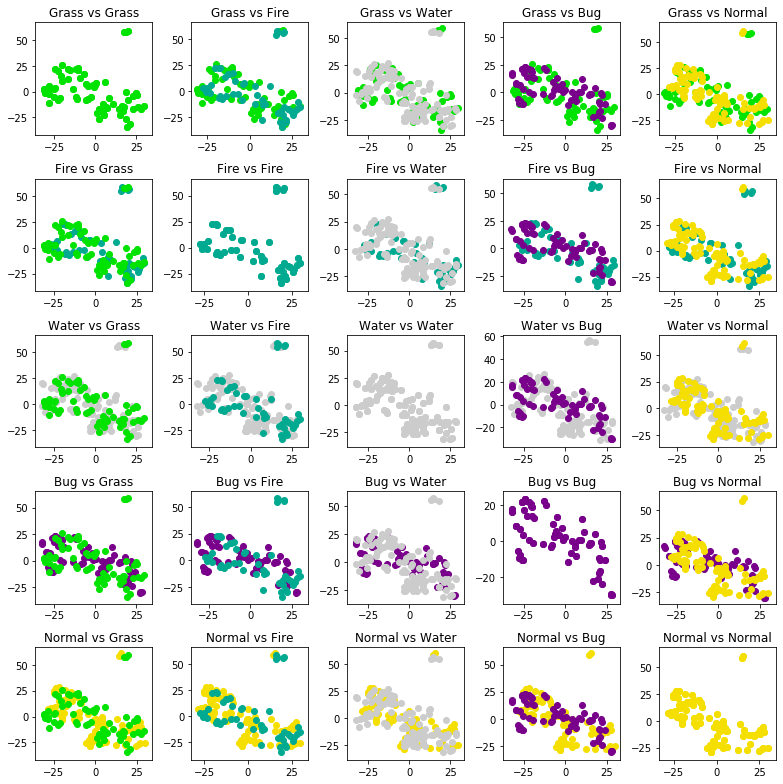

In [15]:
fig = figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = df['Type 1'].unique()
type1_ids = df['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        subplot(rows,cols,num)
        X_i = X_tsne[np.where(df['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(df['Type1Id'] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

In no instance did our TSNE or PCA do any good in separating our types one on one.

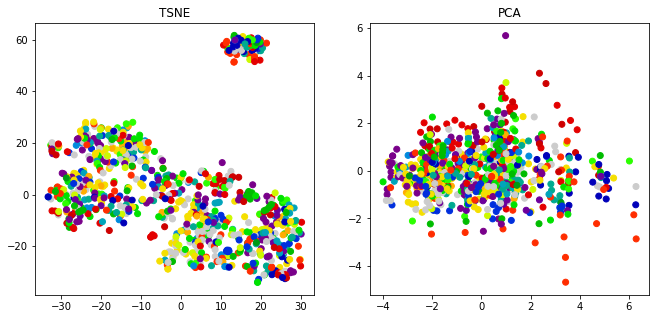

In [16]:
figure(figsize=(11, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('PCA');

Because most of our features are dependent on attack, defense, and other stats of that nature, legendary pokemon are bound to have higher stats of that nature than the rest of the Pokemon. The cluster we see in the TSNE graph is the Legendary Pokemon separated from the rest. We can see that by the below chart.

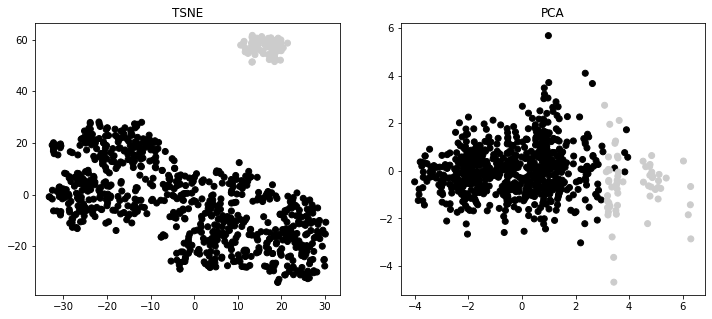

In [17]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Legendary'] * 1.))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Legendary'] * 1.));
title('PCA');

Both TSNE and PCA separate the Legendary Pokemon from the rest, but TSNE does a much better job of it.

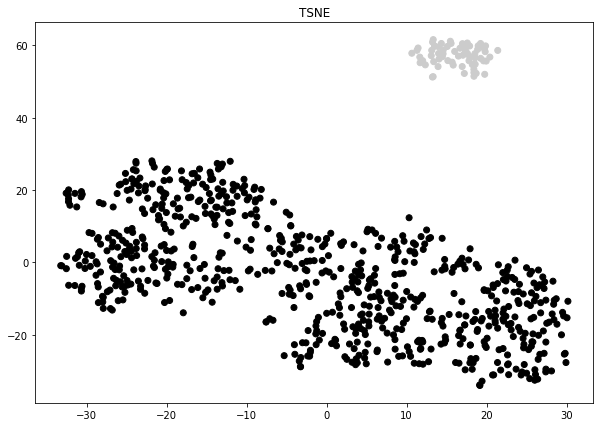

In [18]:
figure(figsize=(10, 7))
cmap = plt.get_cmap('nipy_spectral')

scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Legendary'] * 1.))
title('TSNE');

### Remove non-legendary pokemon

Since our TSNE plot heavily depends on legendary pokemon, we can remove them and consider only non-legendary Pokemon.

In [19]:
df = df[~df['Legendary']]

df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

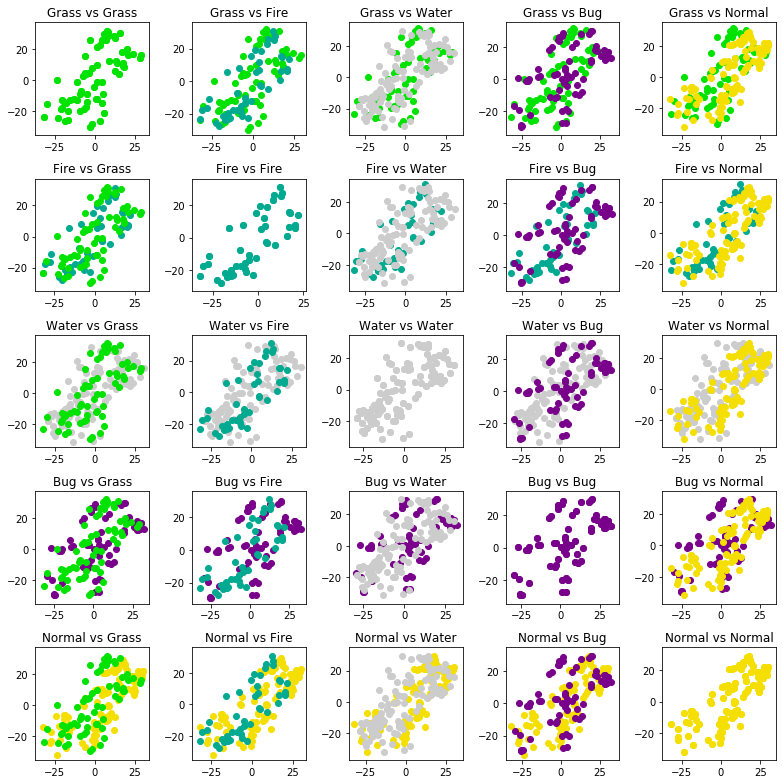

In [20]:
fig = figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = df['Type 1'].unique()
type1_ids = df['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        subplot(rows,cols,num)
        X_i = X_tsne[np.where(df['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(df['Type1Id'] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

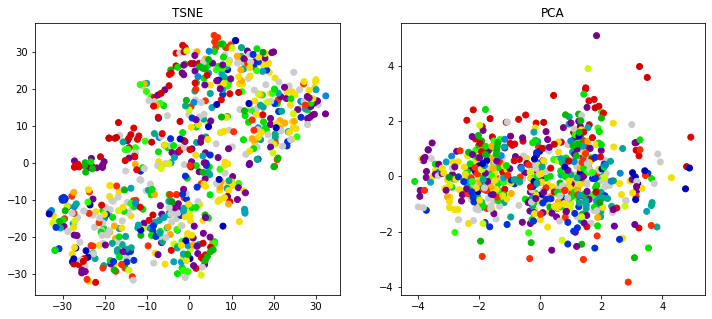

In [80]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('PCA');

The layout determines that it is still not good at detecting the type of the pokemon. Instead, we can focus on which pokemon specializes in what stats.

We can cluster the pokemon according to their 6 main stats.

In [81]:
from sklearn.cluster import KMeans

num_clusters = 6
features0 = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters=num_clusters).fit(X_pca)

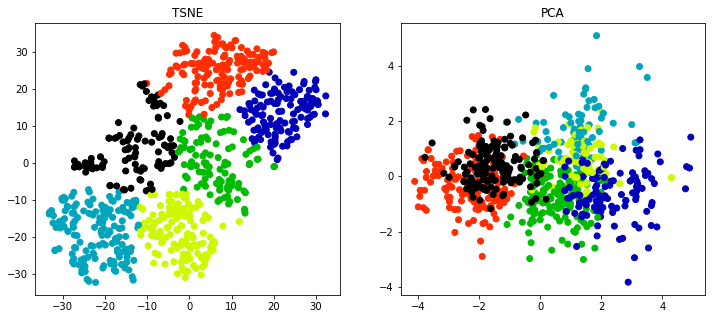

In [92]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(kmeans_pca.labels_ / num_clusters))
title('PCA');

In [94]:
df_norm['tsne_cluster'] = kmeans_tsne.labels_
df_norm['pca_cluster'] = kmeans_pca.labels_
df_tsne_mean = df_norm.groupby('tsne_cluster').mean()
df_pca_mean = df_norm.groupby('pca_cluster').mean()

In [96]:
print("The silhoutte score of the KMeans Clustering solution: {}"
      .format(metrics.silhouette_score(X_tsne, clusters, metric='euclidean')))
print("The silhoutte score of the KMeans Clustering solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

The silhoutte score of the KMeans Clustering solution: 0.4028185307979584
The silhoutte score of the KMeans Clustering solution: 0.13001715719372223


Though we ultimately couldn't group pokemon by types using this these analysis techinques, we ended up intead with other types of clustering and classification. 

In [134]:
from sklearn.cluster import DBSCAN

num_clusters = 6
features0 = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
dbs_tsne = DBSCAN(eps=num_clusters).fit(X_tsne)
dbs_pca = DBSCAN(eps=num_clusters).fit(X_pca)

In [135]:
df_norm['tsne_cluster'] = dbs_tsne.labels_
df_norm['pca_cluster'] = dbs_pca.labels_
df_tsne_mean = df_norm.groupby('tsne_cluster').mean()
df_pca_mean = df_norm.groupby('pca_cluster').mean()

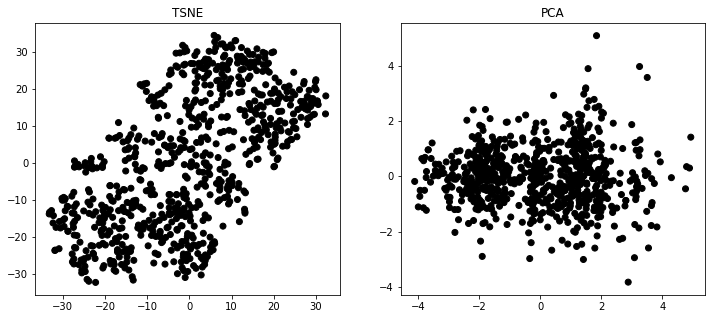

In [136]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(dbs_tsne.labels_ / num_clusters))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(dbs_pca.labels_ / num_clusters))
title('PCA');

In [138]:
print("The silhoutte score of the DBSCAN Clustering solution: {}"
      .format(metrics.silhouette_score(X_tsne, clusters, metric='euclidean')))
print("The silhoutte score of the DBSCAN Clustering solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

The silhoutte score of the DBSCAN Clustering solution: 0.4028185307979584
The silhoutte score of the DBSCAN Clustering solution: 0.13001715719372223


After experimenting with a number of Clusters, for each of my clustering algorithms, KMeans seems to visually be the best at separating the stats efficiently, though in both TSNE and PCA, the silhouette score is fairly poor, but TSNE is leagues ahead of PCA once again.